In [1]:
# imports
import numpy as np

from commstools.impairments import add_gaussian_noise
from commstools.plotting import filter_response, ideal_constellation
from commstools.baseband import qam


2025-12-21 17:39:04 [INFO] [commstools/backend.py] CuPy is available and functional, defaulting Signals to GPU.
2025-12-21 17:39:04 [INFO] [commstools/plotting.py] Applying default plotting theme.


2025-12-21 17:39:04 [INFO] [commstools/plotting.py] Generating ideal constellation for qam (16-level).


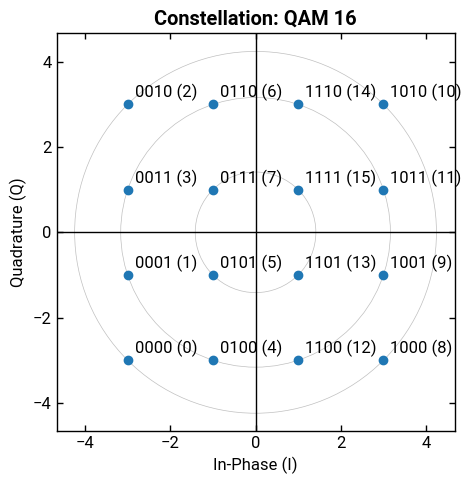

In [2]:
ideal_constellation(modulation="qam", order=16, show=True)


2025-12-21 17:39:04 [INFO] [commstools/baseband.py] Generating QAM baseband: order=16, symbols=100000, sps=5.00, symbol_rate=100.00 GBaud.
2025-12-21 17:39:04 [INFO] [commstools/plotting.py] Generating time-domain plot.


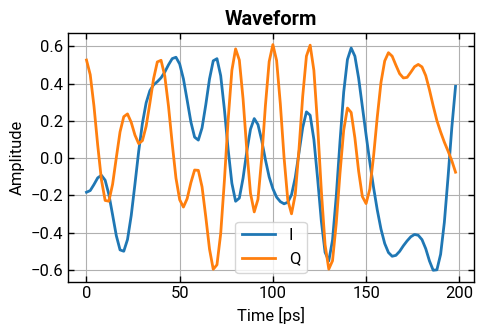

In [3]:
symbol_rate = 100e9
sampling_rate = 500e9
sps = int(sampling_rate / symbol_rate)

sig_4qam = qam(
    order=16,
    num_symbols=100_000,
    sps=sps,
    symbol_rate=symbol_rate,
    pulse_shape="rrc",
    seed=42,
)
sig_4qam.plot_symbols(num_symbols=20, show=True)


2025-12-21 17:39:05 [INFO] [commstools/plotting.py] Generating PSD plot (sampling_rate=500000000000.0 Hz).


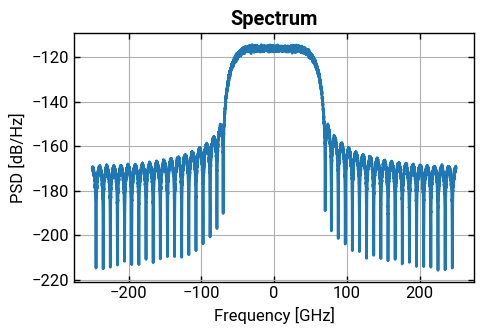

2025-12-21 17:39:05 [INFO] [commstools/plotting.py] Generating eye diagram (hist mode).


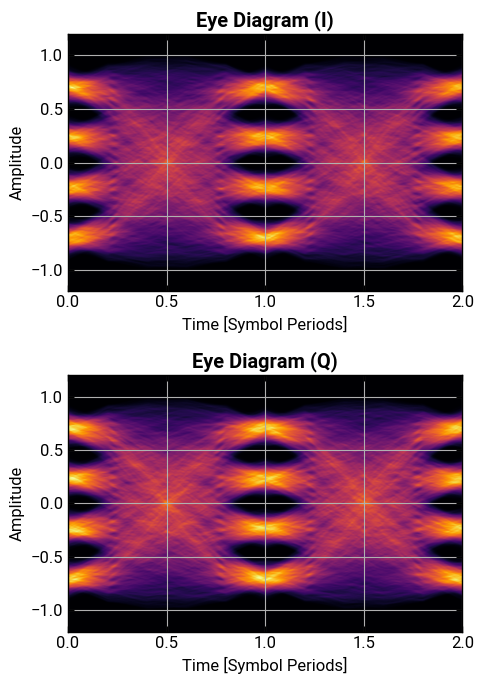

In [4]:
sig_4qam.plot_psd(show=True, nperseg=2**14)
sig_4qam.plot_eye(show=True)


2025-12-21 17:39:06 [INFO] [commstools/impairments.py] Adding Gaussian noise (SNR target: 10.00 dB).
2025-12-21 17:39:06 [INFO] [commstools/plotting.py] Generating time-domain plot.


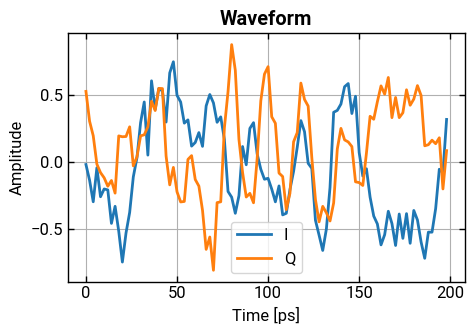

2025-12-21 17:39:06 [INFO] [commstools/plotting.py] Generating PSD plot (sampling_rate=500000000000.0 Hz).


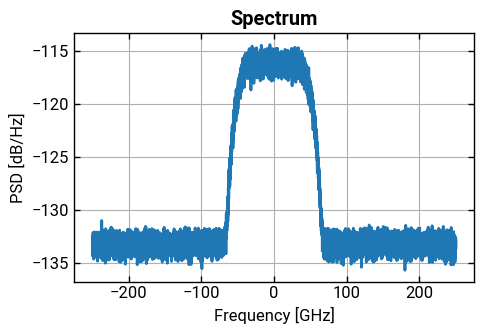

2025-12-21 17:39:06 [INFO] [commstools/plotting.py] Generating eye diagram (hist mode).


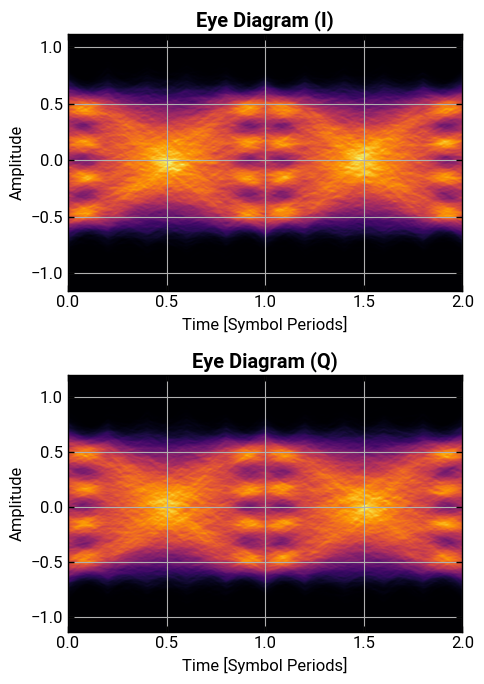

In [5]:
sig_4qam_n = add_gaussian_noise(sig_4qam, snr_db=10)
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_eye(show=True)


2025-12-21 17:39:06 [INFO] [commstools/plotting.py] Generating filter response plot.


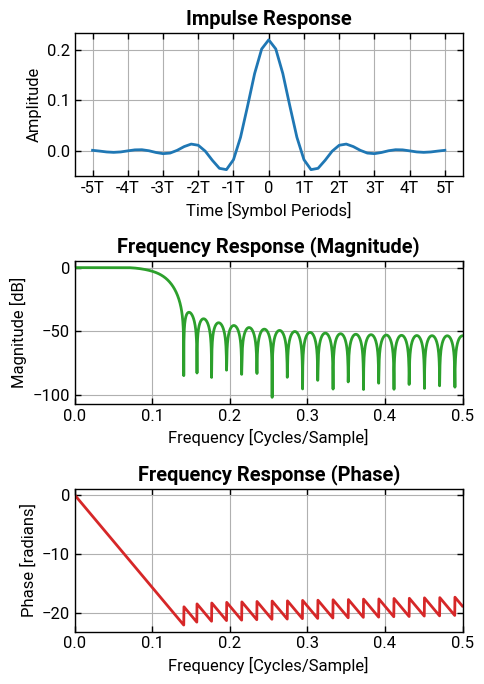

In [6]:
rrc_filter = sig_4qam_n.shaping_filter_taps()
filter_response(rrc_filter, sps=sps, show=True)


2025-12-21 17:39:07 [INFO] [commstools/plotting.py] Generating time-domain plot.


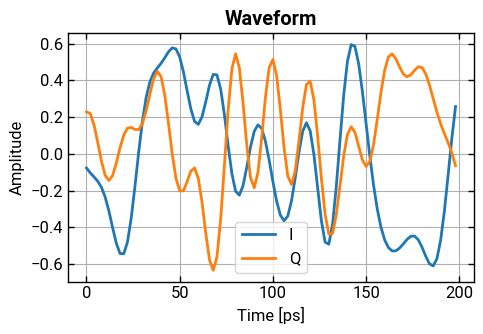

2025-12-21 17:39:07 [INFO] [commstools/plotting.py] Generating PSD plot (sampling_rate=500000000000.0 Hz).


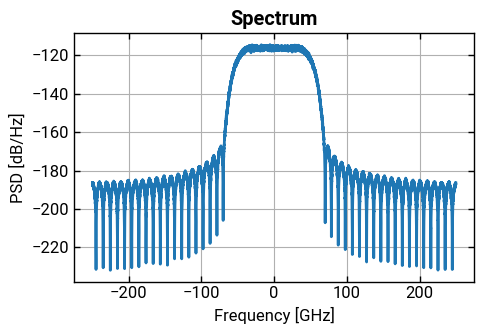

2025-12-21 17:39:07 [INFO] [commstools/plotting.py] Generating eye diagram (hist mode).


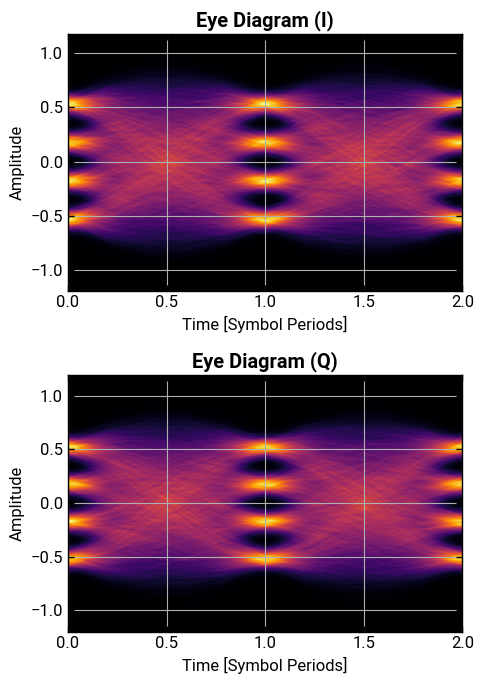

In [7]:
sig_4qam_n.matched_filter()
sig_4qam_n.plot_symbols(num_symbols=20, show=True)
sig_4qam_n.plot_psd(show=True, nperseg=2**14)
sig_4qam_n.plot_eye(show=True)


In [8]:
sig_4qam.print_info()


,Property,Value
0,Spectral Domain,BASEBAND
1,Physical Domain,DIG
2,Modulation Scheme,QAM
3,Modulation Order,16
4,Symbol Rate,100.00 GBaud
5,Bit Rate,400.00 Gbps
6,Sampling Rate,500.00 GHz
7,Samples Per Symbol,5.00
8,Pulse Shape,RRC
9,Duration,1.00 µs


In [9]:
sig_tmp = sig_4qam_n.copy()
sig_tmp.spectral_domain = "PASSBAND"
sig_tmp.physical_domain = "OPT"
sig_tmp.center_frequency = 193.4144e12


2025-12-21 17:39:07 [INFO] [commstools/plotting.py] Generating PSD plot (sampling_rate=500000000000.0 Hz).


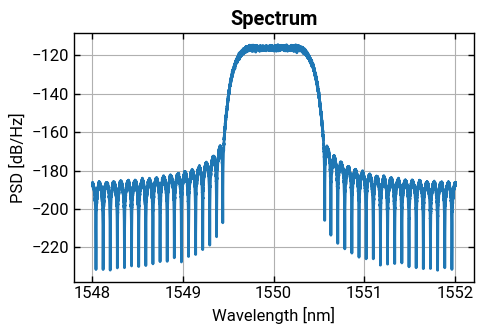

In [10]:
sig_tmp.plot_psd(show=True, x_axis="wavelength", nperseg=2**14)
